#
 Objective:
To build classification model to predict whether the cancer type is Malignant(M) or Benign(B) using Naive Bayes Algorithm (using Gaussian Classifier).

#
 Importing the csv file

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/breast cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:


#
Drop irrelevant columns



In [ ]:
df=df.drop(['Unnamed: 32','id'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#
Define x and y *values*




In [ ]:
x=df.iloc[:,1:].values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y=df.iloc[:,0].values
y

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

#
seperation of training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

array([[1.152e+01, 1.493e+01, 7.387e+01, ..., 9.608e-02, 2.664e-01,
        7.809e-02],
       [1.305e+01, 1.931e+01, 8.261e+01, ..., 1.111e-02, 2.439e-01,
        6.289e-02],
       [1.420e+01, 2.053e+01, 9.241e+01, ..., 1.339e-01, 2.534e-01,
        7.858e-02],
       ...,
       [1.720e+01, 2.452e+01, 1.142e+02, ..., 1.899e-01, 3.313e-01,
        1.339e-01],
       [1.403e+01, 2.125e+01, 8.979e+01, ..., 7.963e-02, 2.226e-01,
        7.617e-02],
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02]])

In [ ]:
x_test

array([[1.469e+01, 1.398e+01, 9.822e+01, ..., 1.108e-01, 2.827e-01,
        9.208e-02],
       [1.317e+01, 1.866e+01, 8.598e+01, ..., 2.088e-01, 3.900e-01,
        1.179e-01],
       [1.295e+01, 1.602e+01, 8.314e+01, ..., 1.056e-01, 3.380e-01,
        9.584e-02],
       ...,
       [1.578e+01, 1.789e+01, 1.036e+02, ..., 1.810e-01, 3.792e-01,
        1.048e-01],
       [1.287e+01, 1.621e+01, 8.238e+01, ..., 5.780e-02, 3.604e-01,
        7.062e-02],
       [1.116e+01, 2.141e+01, 7.095e+01, ..., 4.306e-02, 2.976e-01,
        7.123e-02]])

In [ ]:
y_train

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B

In [ ]:
y_test

array(['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype=object)

#
Normalization using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-0.71883452, -1.0127044 , -0.7245577 , ..., -0.2815459 ,
        -0.35881004, -0.34607992],
       [-0.30216665, -0.01934589, -0.37921906, ..., -1.54873267,
        -0.75672753, -1.24878553],
       [ 0.01101507,  0.25734302,  0.00800276, ...,  0.28247674,
        -0.58871793, -0.31697955],
       ...,
       [ 0.82801089,  1.1622518 ,  0.86897862, ...,  1.11762396,
         0.78896085,  2.96839375],
       [-0.03528136,  0.42063483, -0.09551981, ..., -0.52687039,
        -1.13342276, -0.4601059 ],
       [-0.30761329, -0.22119271, -0.37921906, ..., -0.96681402,
        -1.55609956, -1.32005176]])

In [ ]:
x_test

array([[ 0.14445772, -1.22815887,  0.23756998, ..., -0.06202148,
        -0.07054093,  0.48476556],
       [-0.26948682, -0.1667621 , -0.24606217, ...,  1.39948615,
         1.82708337,  2.01817732],
       [-0.32939985, -0.76549874, -0.35827747, ..., -0.13957087,
         0.90745184,  0.70806642],
       ...,
       [ 0.44129954, -0.34139362,  0.45014685, ...,  0.98489521,
         1.63608298,  1.24018762],
       [-0.3511864 , -0.72240785, -0.38830692, ..., -0.85242867,
         1.30360081, -0.78971222],
       [-0.81687402,  0.45692189, -0.839934  , ..., -1.07225135,
         0.19296888, -0.75348522]])

#
creating Naive Bayes Classification model using Gaussian classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['M', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B'], dtype='<U1')

#
Checking accuracy score and classification report

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
matrix=confusion_matrix(y_pred,y_test)
score=accuracy_score(y_pred,y_test)
report=classification_report(y_test,y_pred)
print(matrix)
print(score)
print(report)

[[102   5]
 [  6  58]]
0.935672514619883
              precision    recall  f1-score   support

           B       0.95      0.94      0.95       108
           M       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



#
diagnosis count of cancer as Banign and Malignant

In [ ]:
diagnosis=df['diagnosis'].value_counts()
diagnosis

B    357
M    212
Name: diagnosis, dtype: int64

#
graphical visuatization

([<matplotlib.patches.Wedge at 0x7f922d26fc10>,
 [Text(-0.4286546999573329, 1.0130425204326268, 'Banign'),
  Text(0.428654605109445, -1.013042560566172, 'Malignant')])

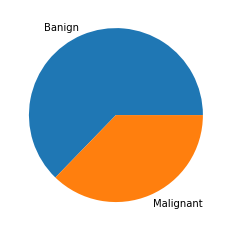

In [ ]:
import matplotlib.pyplot as plt
plt.pie(diagnosis,labels=['Banign','Malignant'])